In [1]:
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt


# OPEN DATA FILE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# READ CSV DATA FILE

In [3]:
import pandas as pd
#BY USING PANDAS LIBRARY TO READ THE NON-HEADER DATAFILE
#NON-HEADER MEANS "FEATURES HAVE NO TITLES"
def read_data(path):
  data = pd.read_csv(path , header = None)
  return data

In [66]:
data = read_data('/content/drive/MyDrive/MAGIC04/magic04.csv')
#CONVERT DATA FRAME TO NUMPY ARRAY
data = data.to_numpy()
data.shape


(19020, 11)

# 1) Data Balancing


In [7]:
#ONLY TAKE DATA FOR 'G' CLASS TO BE EQAUL
#TO 'H' CLASS
#BY TAKING DATA FROM [:6688] FOR 'G' CLASS
#[1233:] FOR 'H' CLASS
def balance_data():
  _g_class_data = data[0:6688]
  _h_class_data = data[12333:]
  balanced_data = np.concatenate((_g_class_data , _h_class_data) , axis = 0)
  return balanced_data

In [8]:
b_data = balance_data()
np.random.shuffle(b_data)
b_data.shape

(13375, 11)

# 2)Data Split 


In [9]:
#SPLITING DATA INTO 30% TESTING SET
#70% TRAINIG SET
testing_set = b_data[0:4013]
training_set = b_data[4014:]

print(testing_set.shape)
print(training_set.shape)

(4013, 11)
(9361, 11)


In [10]:
#SPLIT TRUE LABELS FOR BOTH 
#TRAINIG SET ANS TESTING SET
testing_data_set = testing_set[:,0:-1]
testing_labels = testing_set[:,-1]

training_data_set = training_set[:,0:-1]
training_labels = training_set[:,-1]


#3) a- KNN CLASSIFER "PARAMETER TUNNING"
      
      *    Using KFOLDS cross validation     


  



In [17]:
#APPLY KNN ALGORITHMS ON TRAINIG SET 
#FOR DIFF. K-VALUES TO GET HYPER PARAMETER TUNNING
#AND CHOOSE THE ONE GET THE BEST SCORE
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

def KNN(training_data , training_labels):
  dic = {}
  folds = KFold(n_splits=5 , shuffle=False , random_state=None)
  
  for k in range(1,45,2):
      score = 0
      for train_index , test_index in folds.split(training_data):
        _data_train , _data_validation = training_data[train_index] , training_data[test_index]
        _label_train , _label_validation = training_labels[train_index] , training_labels[test_index]
      
        knn = KNeighborsClassifier(n_neighbors= k ).fit(_data_train , _label_train)
        prediction = knn.predict(_data_validation)
        score = score + metrics.accuracy_score(_label_validation , prediction)
      dic[score / 5] = k
  
  list = dic.items()
  scores , k_values = zip(*list)
  
  loc = np.arange(1,45,step=2.0)
  
  plt.title("KNN")
  plt.plot(range(1,45,2) , scores)
  plt.xticks(loc)
  
  plt.xlabel("K-values")
  plt.ylabel("Accuracy")
  plt.show()

  max_score = max(scores)
  return dic.get(max_score)


Report of the parameter tunned using kfolds cv

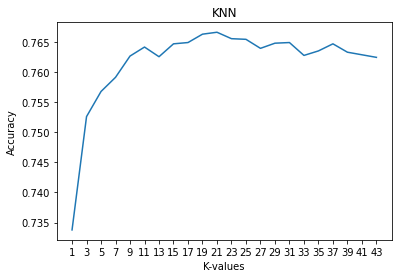

Accuracy =  77.59780712683778 %
Precision =  73.87463188893564 %
Recall =  86.3323500491642 %
F1-Score =  79.61913398322376 %


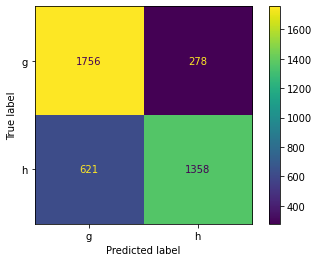

In [58]:
k = KNN(training_data_set , training_labels)
model_eva(k , "KNN")

# 3) b- DECISSION TREE CLASSIFER

      It's has no parameter to be tuned 



Accuracy =  78.8686768003987 %
Precision =  79.65 %
Recall =  78.31858407079646 %
F1-Score =  78.97868120971741 %


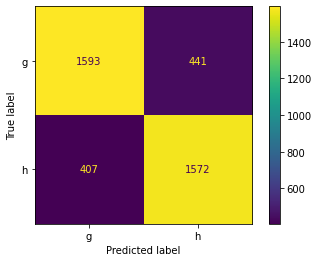

In [57]:
model_eva(None , "d_tree")

#3) c- ADABOOST CLASSIFER "PARAMETER TUNNING"
      
      *    Using KFOLDS cross validation     


  



In [48]:
#APPLY ADABOOST CALSSIFER ON TRAINIG DATA
#USING K-FOLDS AS A CROSS VALIDATION TO GET HYPERPARAMETR
#CHOOSE THE BEST N-ESTIMATOR THAT GIVES HIGH ACC. 
from sklearn.ensemble import AdaBoostClassifier

def adaboost(trainig_data , trainig_label):
  dic = {}
  folds = KFold(n_splits= 5 ,shuffle= False , random_state= None)
  
  for n in range(10,300,10):
    score = 0

    for train_index , validation_index in folds.split(trainig_data):
      _data_train , _data_validation = trainig_data[train_index] , trainig_data[validation_index]
      _train_labels , _validation_labels = trainig_label[train_index] , trainig_label[validation_index]

      ada_boost = AdaBoostClassifier(n_estimators= n).fit(_data_train , _train_labels)
      prediction = ada_boost.predict(_data_validation)
      score = score + metrics.accuracy_score(_validation_labels , prediction)
    dic[score / 5] = n

  list = dic.items()
  scores , n_values = zip(*list)
  loc = np.arange(10,300,step=10.0)
  
  plt.title("ADABOOST")
  plt.plot(range(10,300,10) , scores)
  plt.xticks(loc)
  
  plt.xlabel("N-values")
  plt.ylabel("Accuracy")
  plt.show()

  max_score = max(scores)
  return dic.get(max_score)

Report for the parameter tuned using KFOLDS cv



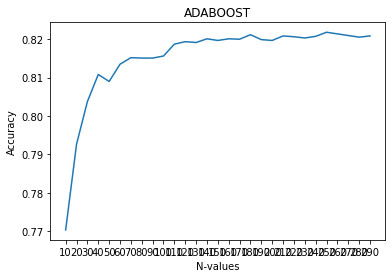

250
Accuracy =  83.3042611512584 %
Precision =  83.33333333333334 %
Recall =  83.82497541789577 %
F1-Score =  83.578431372549 %


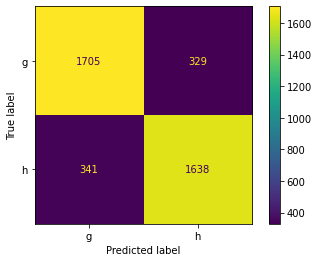

In [62]:
n = adaboost(training_data_set , training_labels)
model_eva(n , "adaboost")

#3) d- RANDOM FOREST CLASSIFER "PARAMETER TUNNING"
      
      *    Using KFOLDS cross validation     


  



In [51]:
from sklearn.ensemble import RandomForestClassifier

#APPLY RANDOM FOREST CALSSIFER ON TRAINIG DATA
#USING K-FOLDS AS A CROSS VALIDATION TO GET HYPERPARAMETR
#CHOOSE THE BEST N-ESTIMATOR THAT GIVES HIGH ACC.
def random_forest(trainig_data , trainig_label):
  dic = {}
  folds = KFold(n_splits= 5 ,shuffle= False , random_state= None)
  
  for n in range(10,300,10):
    score = 0

    for train_index , validation_index in folds.split(trainig_data):
      _data_train , _data_validation = trainig_data[train_index] , trainig_data[validation_index]
      _train_labels , _validation_labels = trainig_label[train_index] , trainig_label[validation_index]

      r_f = RandomForestClassifier(n_estimators= n).fit(_data_train , _train_labels)
      prediction = r_f.predict(_data_validation)
      score = score + metrics.accuracy_score(_validation_labels , prediction)
    dic[score / 5] = n

  list = dic.items()
  scores , n_values = zip(*list)
  loc = np.arange(10,300,step=10.0)
  
  plt.title("RANDOM-FOREST")
  plt.plot(range(10,300,10) , scores)
  plt.xticks(loc)
  
  plt.xlabel("N-values")
  plt.ylabel("Accuracy")
  plt.show()

  max_score = max(scores)
  return dic.get(max_score)

Report for the parameter tuned using KFOLDS cv


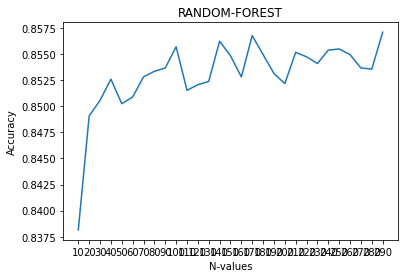

290
Accuracy =  86.16994767007226 %
Precision =  84.89853704577631 %
Recall =  88.4464110127827 %
F1-Score =  86.63616662653503 %


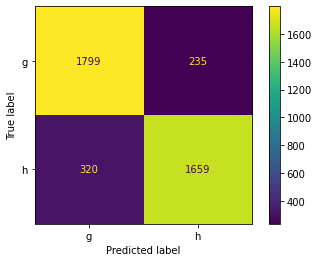

In [63]:
n_Rf = random_forest(training_data_set , training_labels)
model_eva(n_Rf , "randomforest")

# 3) e-NAIVE BAYES CLASSIFER
      It's has no parameter to be tuned 



Accuracy =  65.71143782706204 %
Precision =  61.137440758293835 %
Recall =  88.79056047197639 %
F1-Score =  72.41379310344827 %


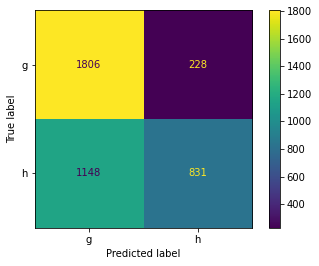

In [61]:
model_eva(None , "naive_bayes")

# 4) MODEL EVALUATION

In [60]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

def model_eva(hyper_parameter , classifer):
  test_prediction = []
  train_prediction = []

  if classifer == "KNN":
    knn = KNeighborsClassifier(n_neighbors= hyper_parameter).fit(training_data_set , training_labels)
    test_prediction = knn.predict(testing_data_set)
    train_prediction = knn.predict(training_data_set)
 
  
  elif classifer == "d_tree":
    d_tree = tree.DecisionTreeClassifier()
    d_tree = d_tree.fit(training_data_set , training_labels)
    test_prediction = d_tree.predict(testing_data_set)
    train_prediction = d_tree.predict(training_data_set)

  elif classifer == "adaboost":
    ada_boost = AdaBoostClassifier(n_estimators= hyper_parameter).fit(training_data_set , training_labels)
    test_prediction = ada_boost.predict(testing_data_set)
    train_prediction = ada_boost.predict(training_data_set)
 

  elif classifer == "randomforest":
    r_f = RandomForestClassifier(n_estimators= hyper_parameter).fit(training_data_set , training_labels)
    test_prediction = r_f.predict(testing_data_set)
    train_prediction = r_f.predict(training_data_set)
  
  elif classifer == "naive_bayes":
    g_nb = GaussianNB().fit(training_data_set , training_labels)
    test_prediction = g_nb.predict(testing_data_set)
    train_prediction = g_nb.predict(training_data_set)

  
  metrics_cal(testing_labels , test_prediction)  

# 5) METRICS CALCULATION 

In [56]:
def metrics_cal(true_labels , predicted_labels):

  print("Accuracy = " , metrics.accuracy_score(true_labels , predicted_labels) * 100 , "%")
  print("Precision = " , metrics.precision_score(true_labels , predicted_labels , pos_label= 'g') * 100 , "%")
  print("Recall = " , metrics.recall_score(true_labels , predicted_labels , pos_label= 'g') * 100 , "%")
  print("F1-Score = " , metrics.f1_score(true_labels , predicted_labels , pos_label= 'g') * 100 , "%")
  ConfusionMatrixDisplay(confusion_matrix(true_labels , predicted_labels), display_labels=['g','h']).plot()